In [1]:
import numpy as np
from PIL import Image
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [2]:
# Load cguitar.tif from local machine into Colab instance
# Note: You only need to run this once
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
  #print('User uploaded file "{name}" with length {length} bytes'.format(
      #name=fn, length=len(uploaded[fn])))

In [3]:
img = np.asarray(Image.open('cguitar.tif'))

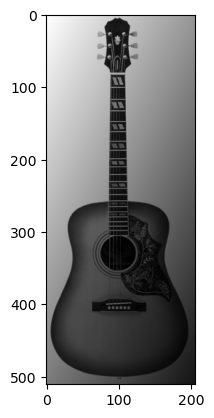

In [4]:
# Hint: Use the following lines to display an image
plt.imshow(img, cmap='gray')
plt.show()

In [5]:
# TODO: Compute least-squares estimate from selected corrupt pixels
trueColorValue = 255

A = np.zeros((250*50,3))

B = np.zeros(250*50)

j = 0
for y in range(250):
    for x in range(50):
        A [j,0] = trueColorValue*x
        A [j,1] = trueColorValue*y
        A [j,2] = trueColorValue
        B [j] = img[y,x]
        j = j+1

q = np.linalg.lstsq(A, B, rcond=None)[0]

a = q[0]
b = q[1]
c = q[2]

print('f(x,y) = {0:2.3f}x + {1:2.3f}y + {2:2.3f}'.format(q[0], q[1],q[2]))

f(x,y) = -0.002x + -0.001y + 0.995


In [6]:
# TODO: Undo the image corruption
correctedImage = np.zeros((len(img),len(img[0])))

for y in range(len(img)):
    for x in range(len(img[0])):
        correctedImage[y,x] = img[y,x] / (a*x + b*y + c)

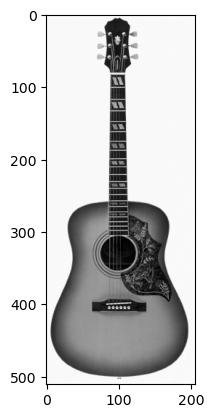

In [7]:
# TODO: Display the uncorrupted image
plt.imshow(correctedImage, cmap='gray')
plt.show()